## **Librerías**

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
from sklearn.model_selection import (
    train_test_split, 
    KFold, 
    StratifiedKFold, 
    GroupKFold, 
    StratifiedGroupKFold,
    cross_val_score
) 

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, 
    roc_auc_score, 
    classification_report,
    confusion_matrix
)

In [4]:
import utils.functions as utils

## **Datos**

In [30]:
churn = pd.read_csv('./Datos/customer_churn_dataset-train.csv')

### **Limpieza de datos**

In [31]:
churn = pd.get_dummies(churn, drop_first=True)

In [37]:
# Ajustamos los valores booleanos a dummies
churn['Gender_Male'].replace({
    False: 0,
    True: 1
}, inplace=True)

churn['Subscription Type_Premium'].replace({
    False: 0,
    True: 1
}, inplace=True)

churn['Subscription Type_Standard'].replace({
    False: 0,
    True: 1
}, inplace=True)

churn['Contract Length_Monthly'].replace({
    False: 0,
    True: 1
}, inplace=True)

churn['Contract Length_Quarterly'].replace({
    False: 0,
    True: 1
}, inplace=True)

### **Preparamos nuestros datos para el modelo**

In [55]:
churn.drop(199295, inplace=True)

### **Limpieza de datos**

In [57]:
X = churn.drop(['CustomerID', 'Churn'], axis=1).copy()
y = churn[['Churn']].copy()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.3)

## **Modelo**

In [59]:
modelo = RandomForestClassifier(random_state=13)

In [60]:
modelo.fit(X_train, y_train)

C:\Users\jmart\AppData\Local\Temp\ipykernel_17908\2554334259.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


RandomForestClassifier(random_state=13)

In [78]:
y_pred = modelo.predict(X_test)
y_pred_proba = modelo.predict_proba(X_test)

In [96]:
roc_auc_score(y_test, pd.DataFrame(y_pred_proba)[1])*100

99.99998644776227

In [62]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     57353
         1.0       1.00      1.00      1.00     74897

    accuracy                           1.00    132250
   macro avg       1.00      1.00      1.00    132250
weighted avg       1.00      1.00      1.00    132250



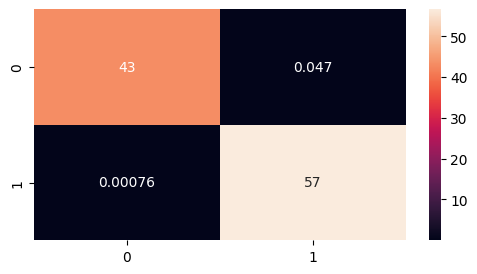

In [77]:
fig, ax = plt.subplots(figsize=(6, 3))
sns.heatmap(confusion_matrix(y_pred, y_test)/len(y_pred)*100, annot=True)
plt.show()

### **Cross Validation**

#### **1. KFold**

In [98]:
kfold = KFold(n_splits=5, shuffle=True, random_state=13)

In [101]:
scores_kfold = cross_val_score(modelo, X, y['Churn'], cv=kfold)

C:\Users\jmart\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jmart\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jmart\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jmart\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

In [102]:
scores_kfold

array([0.99963705, 0.99973913, 0.99963705, 0.99950094, 0.99947826])

In [104]:
scores_kfold.mean()

0.9995984860917273

#### **2. Stratified KFold Cross Validation**

In [105]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)

In [109]:
scores_stratified_kfold = cross_val_score(modelo, X, y['Churn'], cv=stratified_kfold)

In [110]:
scores_stratified_kfold

array([0.999569  , 0.99953497, 0.99969376, 0.99942155, 0.99968242])

In [111]:
scores_stratified_kfold.mean()

0.9995803391239864

#### **3. Group KFold**

In [113]:
group_kfold = GroupKFold(n_splits=5)

In [ ]:
scores_group_kfold = cross_val_score(modelo, X, y['Churn'])

In [ ]:
scores_group_kfold

In [ ]:
scores_group_kfold.mean()

#### **4. Stratified Group KFold**

In [ ]:
stratified_group_kfold = StratifiedGroupKFold(n_splits=5)

In [ ]:
scores_stratified_group_kfold = cross_val_score(modelo, X, y['Churn'])

In [ ]:
scores_stratified_group_kfold

In [ ]:
scores_stratified_group_kfold.mean()